**__TP2__**

In [16]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn

__Decision tree__

In [ ]:
import sys
sys.path

In [ ]:
mglearn.plots.plot_animal_tree()

Building decision trees

In [ ]:
mglearn.plots.plot_tree_progressive()

Controlling complexity of decision trees

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Analyzing Decision Trees

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [ ]:
import graphviz

with open("./tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Feature importance in trees

In [ ]:
print("Feature importances:")
print(tree.feature_importances_)

In [ ]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

In [ ]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

__Exercice 1__

https://inria.github.io/scikit-learn-mooc/python_scripts/trees_dataset.html
https://github.com/INRIA/scikit-learn-mooc/blob/main/datasets/penguins_classification.csv

1) Load the data set using pandas and display the first few rows of the data frame.

In [18]:
penguins = pd.read_csv("./penguins_classification.csv")

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"] #data
target_column = "Species" #target

penguins.head()

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie


2) Split the data into a training (80%) and a testing set (20%).

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(penguins[culmen_columns], penguins[target_column], test_size=0.2, random_state=2)

In [22]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

3) Use the `plot_tree` function from `sklearn.tree` to plot the decision tree.

[Text(0.4, 0.9375, 'Culmen Length (mm) <= 42.35\ngini = 0.642\nsamples = 273\nvalue = [120, 60, 93]\nclass = Adelie'),
 Text(0.26666666666666666, 0.8125, 'Culmen Depth (mm) <= 15.1\ngini = 0.051\nsamples = 114\nvalue = [111, 0, 3]\nclass = Adelie'),
 Text(0.2, 0.6875, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Gentoo'),
 Text(0.3333333333333333, 0.6875, 'gini = 0.0\nsamples = 111\nvalue = [111, 0, 0]\nclass = Adelie'),
 Text(0.5333333333333333, 0.8125, 'Culmen Depth (mm) <= 16.35\ngini = 0.534\nsamples = 159\nvalue = [9, 60, 90]\nclass = Gentoo'),
 Text(0.4666666666666667, 0.6875, 'gini = 0.0\nsamples = 84\nvalue = [0, 0, 84]\nclass = Gentoo'),
 Text(0.6, 0.6875, 'Culmen Length (mm) <= 46.05\ngini = 0.339\nsamples = 75\nvalue = [9, 60, 6]\nclass = Chinstrap'),
 Text(0.3333333333333333, 0.5625, 'Culmen Depth (mm) <= 18.3\ngini = 0.526\nsamples = 23\nvalue = [9, 13, 1]\nclass = Chinstrap'),
 Text(0.13333333333333333, 0.4375, 'Culmen Depth (mm) <= 16.5\ngini = 0.272\nsamples = 1

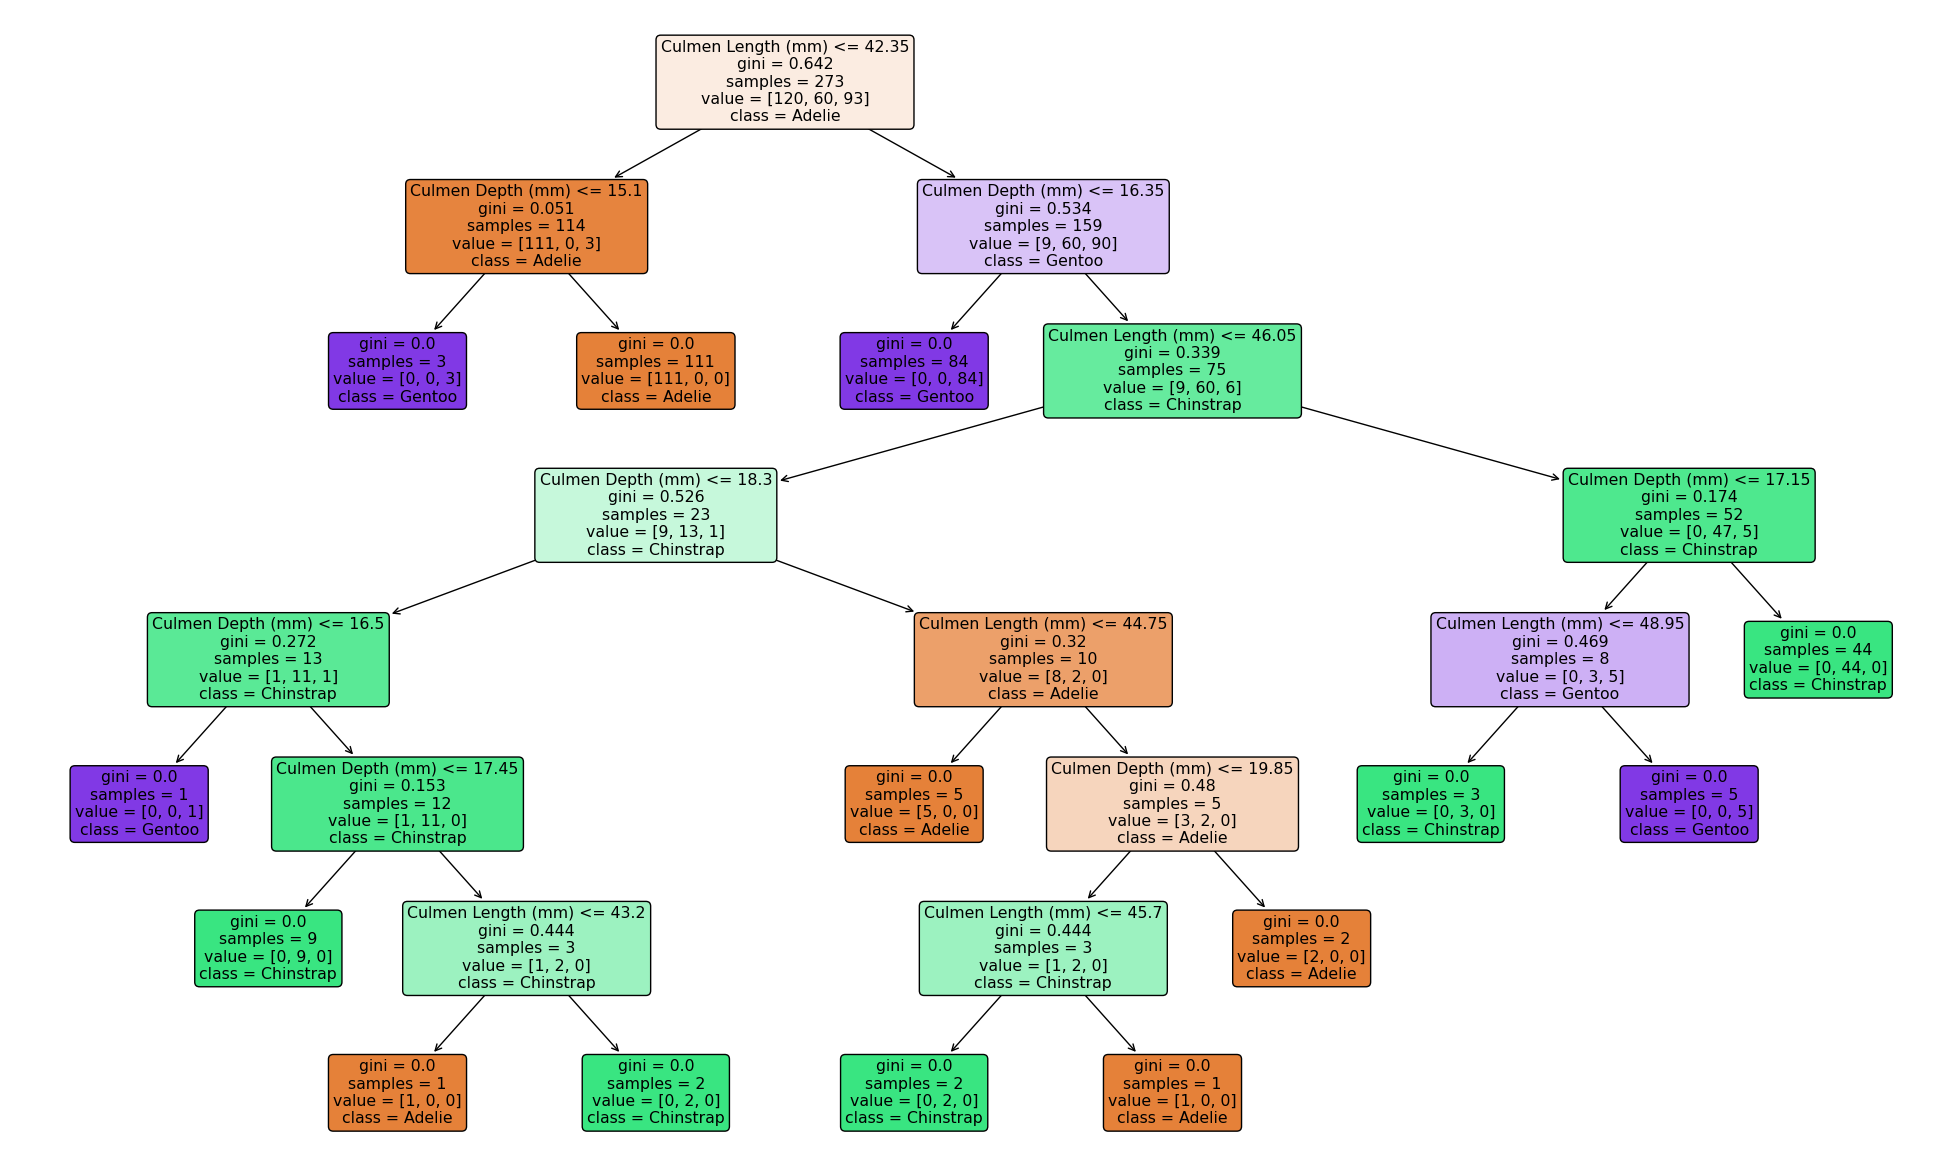

In [26]:
#plot two level decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 15))
plot_tree(tree, filled=True, rounded=True, class_names=["Adelie", "Chinstrap", "Gentoo"], feature_names=culmen_columns)

4) Use the `score` method of the decision tree to compute the accuracy on the training and testing data.

In [27]:
tree.score(X_test, y_test)

0.927536231884058